## My project on "Hand on ML with Keras Tensorflow and Sci-kit learn"

In [11]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def load_housing_data(housing_path='./datasets/housing/'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing_df = load_housing_data()

In [13]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


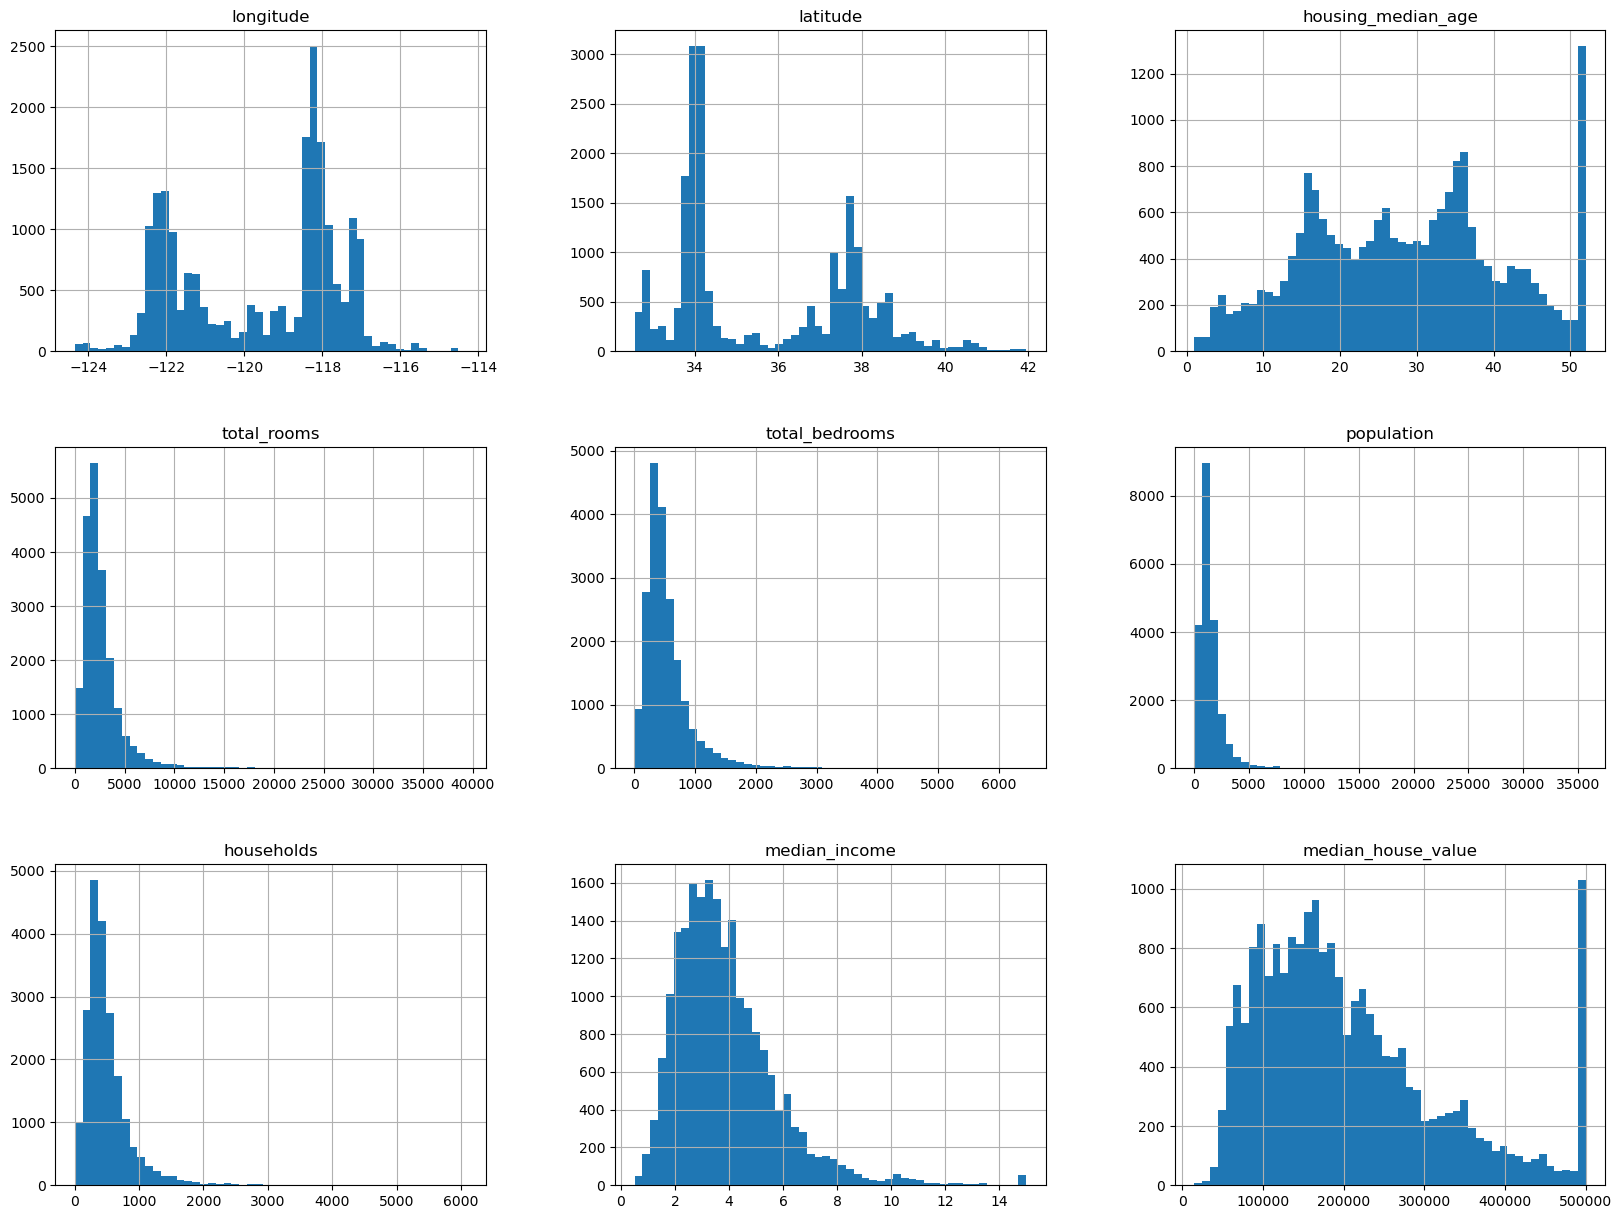

In [14]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

###### This md note is just for you to see how `np.random.permutation()` works:
*** 
It basically takes in an integer and gives a randomly arranged set of numbers which starts from zero up until the integer that number specified 
***
```
randstuff = np.random.permutation(10)
print(randstuff)
Output: array([9, 4, 1, 7, 8, 5, 0, 6, 2, 3])
```

- Let's seperate our training set from our test set!!

In [15]:
def train_test_split(data, test_ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_set_indexes = shuffled_indexes[:test_size]
    train_set_indexes = shuffled_indexes[test_size:]
    return [data.iloc[train_set_indexes], data.iloc[test_set_indexes]]
    print('''
        Usage: train_set, test_set = split_train_test(data, test_ratio)
        data: A pandas dataframe....
        test_ratio: Should be in the range of [0 - 1]
    ''')

```
Well, the function above works well but there's still a problem here.
if we run the program again, we will get a different test set and overtime, your ML algorithm will see the whole dataset which is what me and you know you want to avoid 😎😎😎.
One solution is to save the testset on the firat run, and load it subsequently. Another option is to set the random generator seed
```

In [17]:
train_set, test_set = train_test_split(housing_df, 0.2)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8206,-118.16,33.79,25.0,3742.0,1180.0,3916.0,1063.0,2.4000,153700.0,NEAR OCEAN
20520,-121.53,38.58,35.0,1316.0,321.0,732.0,336.0,2.1213,79200.0,INLAND
9319,-122.53,37.97,52.0,205.0,119.0,228.0,132.0,1.9063,200000.0,NEAR BAY
3706,-118.39,34.19,23.0,1875.0,710.0,2555.0,657.0,2.0968,162500.0,<1H OCEAN
16026,-122.44,37.73,52.0,2838.0,567.0,1411.0,526.0,3.8304,261400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
5231,-118.24,33.93,32.0,779.0,201.0,861.0,219.0,1.0625,89800.0,<1H OCEAN
1466,-121.98,37.96,12.0,5048.0,1122.0,2209.0,1014.0,3.1573,126700.0,INLAND
10694,-117.74,33.62,16.0,1889.0,590.0,686.0,537.0,3.4706,241700.0,<1H OCEAN
19075,-122.48,38.30,17.0,2703.0,550.0,1241.0,515.0,2.6520,171300.0,<1H OCEAN
